In [73]:
# importation des bibliothèques 
from math import *
import numpy as np
from numpy import *
from numpy.fft import fft, ifft, fftshift
import matplotlib.pyplot as plt
from cmath import exp

In [84]:
# définition des parametres 
nt=200
epsilon0=8.85*1e-12
epsilonr=12.6
e=1.602*1e-19
mun=0.4
mup=0.015
en=37
cp=1.6*1e-14
cn=4.1*1e-14
nT0=5*1e21
pT0=6*1e22
phip=(1/1.275)*1e-3
n0=en*nT0/(cn*pT0)
I0=10000
w=2*1e-5
E0=1e8
n=3.17
reff=1.7*1e-12
epsilon=epsilon0*epsilonr
A=e*mun*n0/epsilon
Q=e*mup*phip*pT0/(epsilon*cp*nT0)
t=np.linspace(1,100,nt)


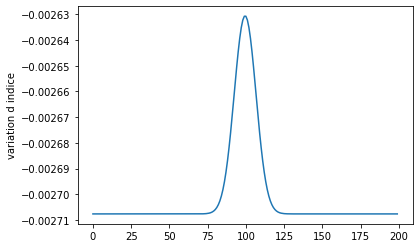

In [85]:

I0=100
w=2e-5
n=3.17
l=400*1e-6
L=10*1e-3
nx=200
nz=200
nt=200
x=np.linspace(-l/2,l/2,nx)
z=np.linspace(0,L,nz)
kx=np.linspace(-2*pi/l*floor(nx/2+1),2*pi/l*floor(nx/2),nx)
dz=L/nz
#Calcul de la variation d'indice
def I(x):
    return I0*np.exp(-x**2/w**2)
def E(x,t):
    d=A+Q*I(x)
    return E0*(A+Q*I(x)*np.exp(-d*t))/d

dn=-1/2*(n**3)*reff*E(x,t)
plt.plot(dn)
plt.ylabel('variation d indice')
#solution A
lamda=1064*1e-9
k=(2*pi)/lamda
A=np.zeros((nx,nz))
S=1j*k*dn/n


C:\Users\toshiba\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys
C:\Users\toshiba\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
C:\Users\toshiba\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


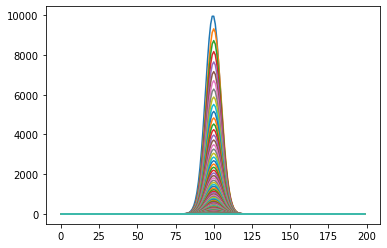

In [86]:
A[:,0]=I0*np.exp(-x**2/w**2) 
F=np.zeros((nx,nz))

for t in range(nt):#Première boucle sur t (le temps pour calculer la variantion d'indice) effet de milieu photoréfractif
    S=1j*k*dn[t]/n
    for i in range(nz-1): #deuxième boucle sur l'espace pour résoudre l'équation NL
        F[:,i]=np.fft.fft(A[:,i])
        F[:,i+1]=F[:,i]*np.fft.fftshift(np.exp((-1j*(kx**2)/(2*k))*dz))
        A[:,i+1]=np.fft.ifft(F[:,i+1])*exp(S*dz)
I=abs(A)**2
plt.plot(I)


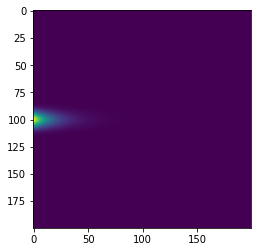

In [87]:
plt.imshow(I)